In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv("ipl.csv")
df.shape

(76014, 15)

In [95]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [114]:
numerical_features = [feature for feature in df if df[feature].dtype != 'O']
print(numerical_features)
categorical_features = [feature for feature in df if df[feature].dtype == 'O']
print(categorical_features)

['mid', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'total']
['date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']


In [118]:
df_date = df.iloc[:, 1]
df_date

0        2008-04-18
1        2008-04-18
2        2008-04-18
3        2008-04-18
4        2008-04-18
            ...    
76009    2017-05-21
76010    2017-05-21
76011    2017-05-21
76012    2017-05-21
76013    2017-05-21
Name: date, Length: 76014, dtype: object

[]

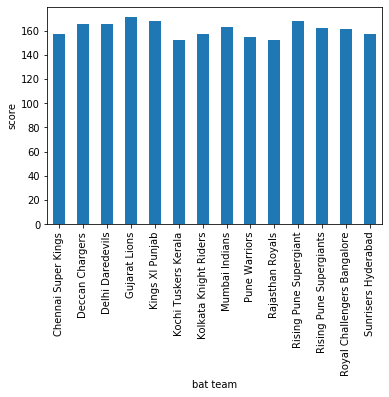

In [96]:
#for feature in df['venue']:
data = df.copy()

data.groupby('bowl_team')['total'].median().plot.bar()
plt.xlabel('bat team')
plt.ylabel('score')
plt.plot()

In [97]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [98]:
df = df.drop('non-striker', axis = 1)
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,222


In [108]:
data = df[df.columns[2:7]]
data.head()

,venue,bat_team,bowl_team,batsman,bowler
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar


venue


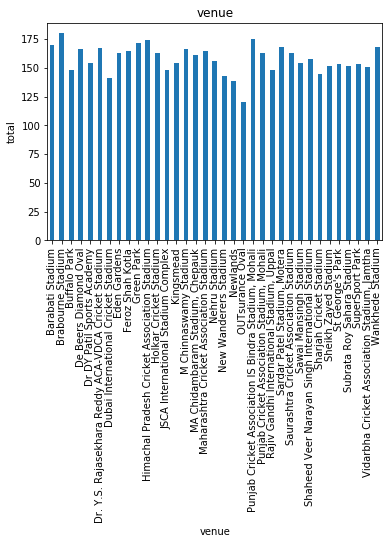

bat_team


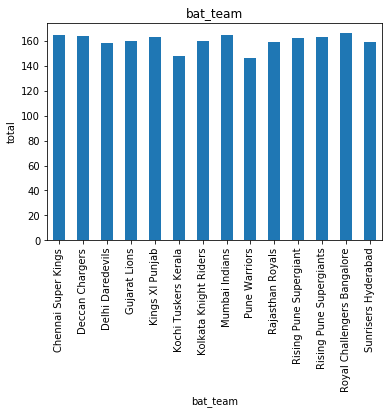

bowl_team


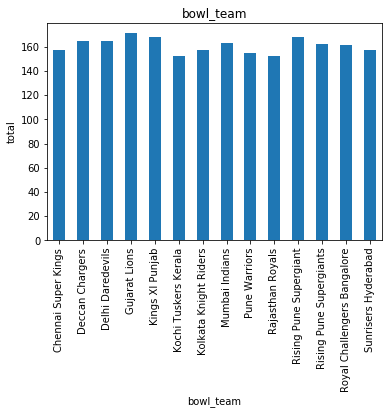

batsman


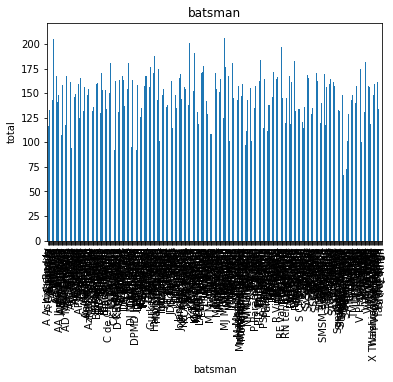

bowler


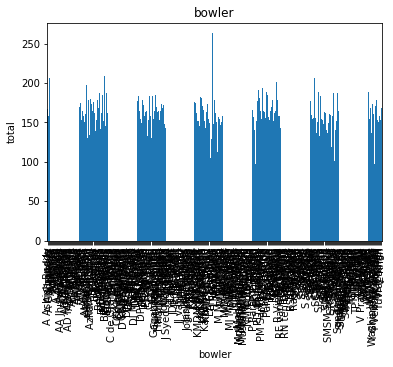

In [109]:
for feature in data:
    print(feature)
    _data = df.copy()
    _data.groupby(feature)['total'].median().plot.bar()
    
    plt.xlabel(feature)
    plt.ylabel('total')
    plt.title(feature)
    plt.show()

In [60]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [61]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']


In [62]:
df = df[(df['bat_team'].isin(consistent_teams)) &
        (df['bowl_team'].isin(consistent_teams))]
df.shape

(53811, 14)

In [63]:
df = df[ df['overs'] >= 5.0 ]

In [64]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [120]:
df['date'] = df['date'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))

0        2008
1        2008
2        2008
3        2008
4        2008
         ... 
76009    2017
76010    2017
76011    2017
76012    2017
76013    2017
Name: date, Length: 76014, dtype: int64

one hot encoding

In [67]:
df = pd.get_dummies(data = df)

In [70]:
df.columns

Index(['mid', 'date', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'striker', 'total', 'venue_Barabati Stadium',
       ...
       'bowler_VS Yeligati', 'bowler_VY Mahesh', 'bowler_WA Mota',
       'bowler_WD Parnell', 'bowler_Y Venugopal Rao', 'bowler_YA Abdulla',
       'bowler_YK Pathan', 'bowler_YS Chahal', 'bowler_Yuvraj Singh',
       'bowler_Z Khan'],
      dtype='object', length=658)

In [74]:
X_train = df.drop(labels = 'total', axis = 1)[df['date'].dt.year <= 2016]
X_test = df.drop(labels = 'total', axis = 1)[df['date'].dt.year >= 2017]

In [80]:
y_train = df['total'][df['date'].dt.year <= 2016].values
y_test = df['total'][df['date'].dt.year >= 2017].values

In [82]:
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [83]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)